#Theoratical


### 1. **Unsupervised learning**

It’s a type of machine learning where the model finds hidden patterns in unlabeled data. Clustering is a key technique used.

---

### 2. **How K-Means works**

It assigns each point to the nearest centroid, then updates centroids based on the average of assigned points until convergence.

---

### 3. **Dendrogram in Hierarchical Clustering**

A dendrogram is a tree-like diagram showing how clusters merge or split at each level of hierarchical clustering.

---

### 4. **K-Means vs. Hierarchical Clustering**

K-Means is flat and needs K in advance; hierarchical builds a tree structure and doesn’t require K.

---

### 5. **Advantages of DBSCAN over K-Means**

DBSCAN doesn’t need the number of clusters, handles noise, and works well with clusters of varying shapes and sizes.

---

### 6. **Use of Silhouette Score**

It evaluates how well each point fits its cluster. A higher score means better separation between clusters.

---

### 7. **Limitations of Hierarchical Clustering**

It’s computationally expensive, can't undo wrong merges, and is sensitive to noise and outliers.

---

### 8. **Importance of Feature Scaling**

Since clustering relies on distance, unscaled features may distort results. Scaling ensures fair contribution from all features.

---

### 9. **DBSCAN and Noise Points**

Points not having enough neighbors (MinPts) within the defined radius (ε) are marked as noise.

---

### 10. **Inertia in K-Means**

Inertia is the total squared distance from points to their cluster centroids. Lower inertia indicates better clustering.

---

### 11. **Elbow Method in K-Means**

It helps find the optimal K by plotting inertia vs. K and picking the point where the drop starts to level off.

---

### 12. **Density in DBSCAN**

A region is dense if a point has enough neighbors (MinPts) within a certain distance (ε), forming the basis of clusters.

---

### 13. **Hierarchical Clustering on Categorical Data**

Yes, it can be applied using special distance measures like Hamming distance suited for categorical features.

---

### 14. **Negative Silhouette Score**

It indicates the point might be in the wrong cluster as it is closer to another cluster than its own.

---

### 15. **Linkage Criteria in Hierarchical Clustering**

It defines how distances between clusters are calculated — options include single, complete, and average linkage.

---

### 16. **K-Means on Varying Sizes/Densities**

K-Means assumes equal-sized, spherical clusters, so it performs poorly on clusters with different shapes or densities.

---

### 17. **Core Parameters of DBSCAN**

ε defines the neighborhood radius, and MinPts is the minimum points required to form a dense cluster.

---

### 18. **K-Means++ Improvement**

K-Means++ selects initial centroids more strategically, reducing the chances of poor clustering and speeding up convergence.

---

### 19. **Agglomerative Clustering**

It’s a bottom-up approach where each data point starts in its own cluster and clusters merge step-by-step.

---

### 20. **Silhouette Score vs. Inertia**

Silhouette Score evaluates both cluster compactness and separation, while inertia only checks compactness.



#Practical

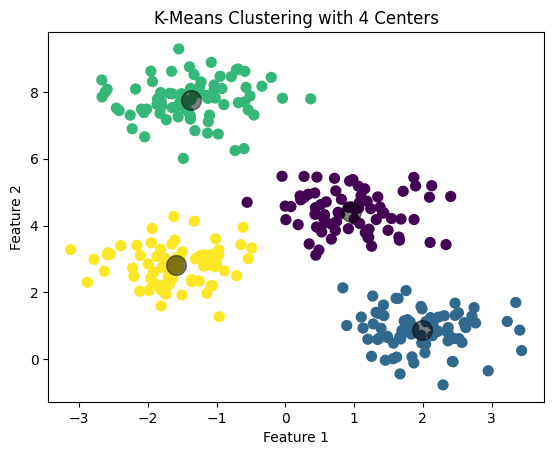

In [1]:
# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
# scatter plot

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [2]:
# 22.  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
# predicted labels

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)

y_predicted = agg_clustering.labels_

print("First 10 predicted labels:", y_predicted[:10])

First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


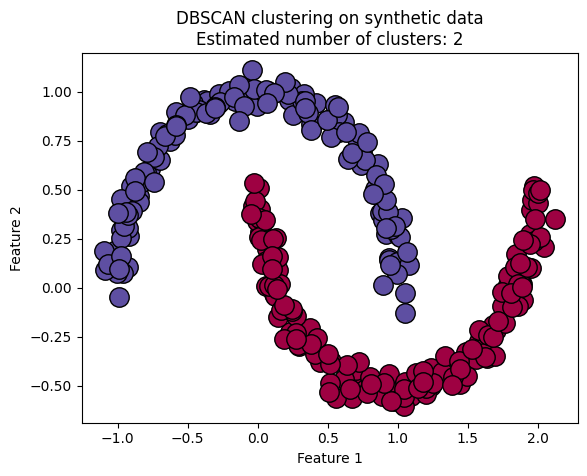

In [3]:
# 23.  Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

y_dbscan = dbscan.labels_

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
  if k == -1:

    col = [0, 0, 0, 1]

  class_member_mask = (labels == k)

  xy = X[class_member_mask & core_samples_mask]
  plt.plot(
      xy[:, 0],
      xy[:, 1],
      "o",
      markerfacecolor=tuple(col),
      markeredgecolor="k",
      markersize=14,
  )

  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(
      xy[:, 0],
      xy[:, 1],
      "o",
      markerfacecolor=tuple(col),
      markeredgecolor="k",
      markersize=6,
  )

plt.title("DBSCAN clustering on synthetic data\nEstimated number of clusters: %d" % n_clusters_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
# 24.  Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
# cluster

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from collections import Counter

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

y_kmeans = kmeans.labels_

cluster_counts = Counter(y_kmeans)

print("Size of each cluster:")
for cluster_id, count in cluster_counts.items():
  print(f"Cluster {cluster_id}: {count}")


Size of each cluster:
Cluster 2: 62
Cluster 0: 65
Cluster 1: 51


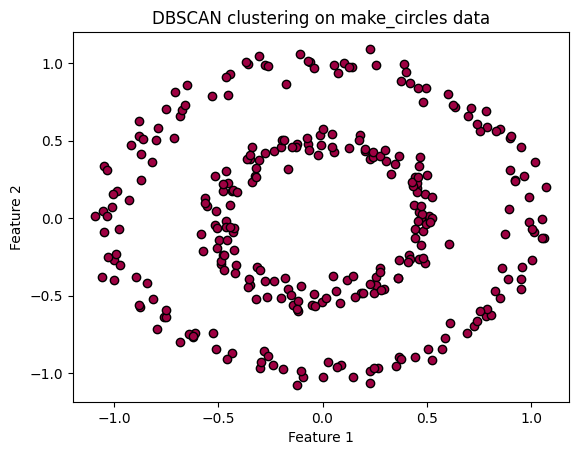

In [6]:
# 25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

y_dbscan = dbscan.labels_

unique_labels = set(y_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (y_dbscan == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title("DBSCAN clustering on make_circles data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# 26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
# centroids

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

breast_cancer = load_breast_cancer()
X = breast_cancer.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

centroids = kmeans.cluster_centers_
print("Cluster Centroids:\n", centroids)

Cluster Centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


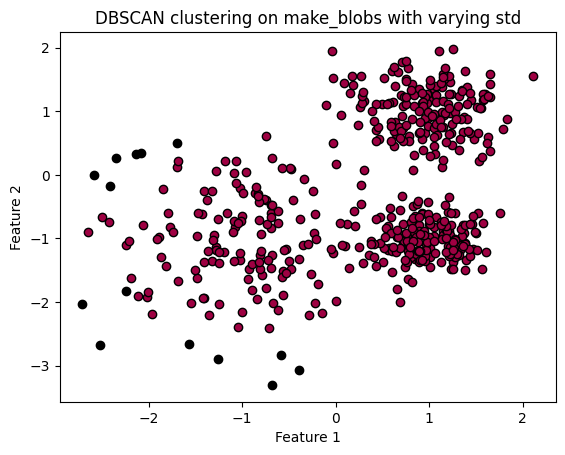

In [7]:


import matplotlib.pyplot as plt
import numpy as np
# 27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

X, y = make_blobs(
    n_samples=500,
    centers=[[1, 1], [-1, -1], [1, -1]],
    cluster_std=[0.4, 0.8, 0.3],
    random_state=170,
)

dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X)
y_dbscan = dbscan.labels_

unique_labels = set(y_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = [0, 0, 0, 1]

    class_member_mask = (y_dbscan == k)

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("DBSCAN clustering on make_blobs with varying std")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

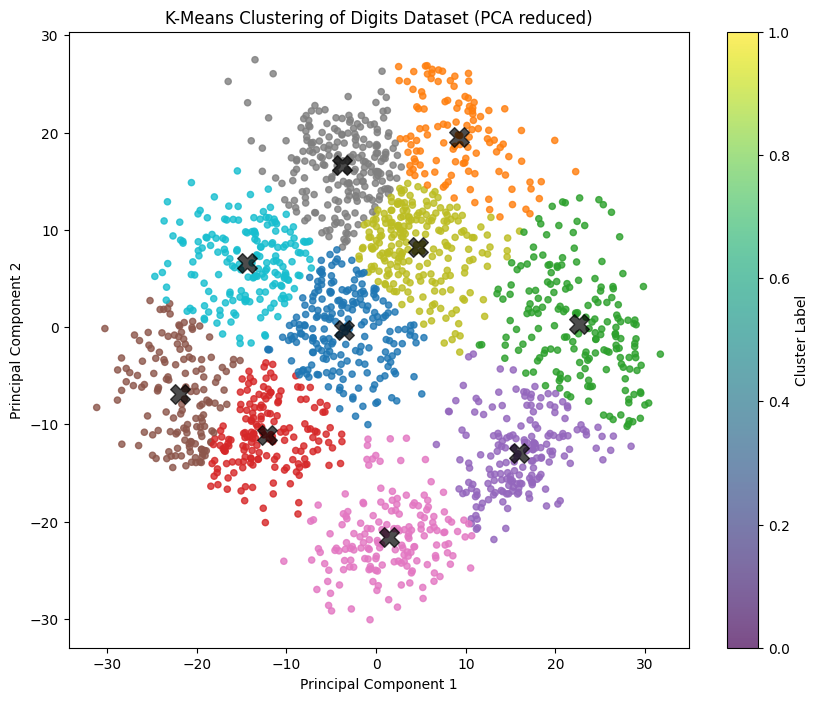

In [8]:
# 28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(X_pca)
y_kmeans = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='tab10', s=20, alpha=0.8)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7, marker='X')
plt.title('K-Means Clustering of Digits Dataset (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

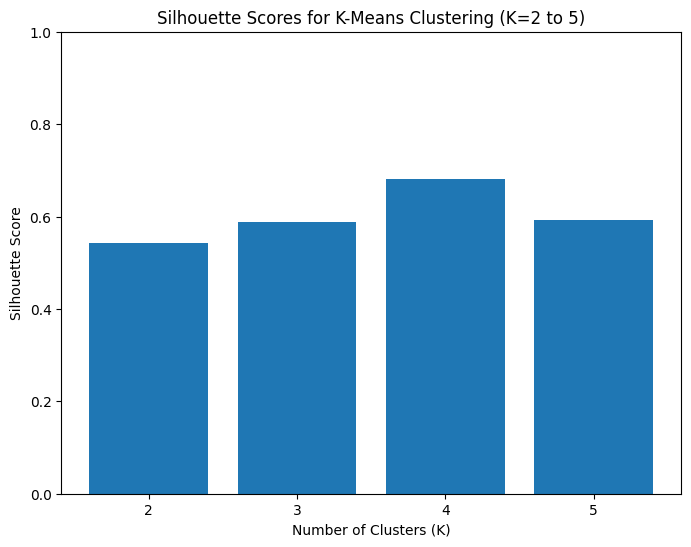

In [9]:
#29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering (K=2 to 5)')
plt.xticks(k_values)
plt.ylim(0, 1)
plt.show()

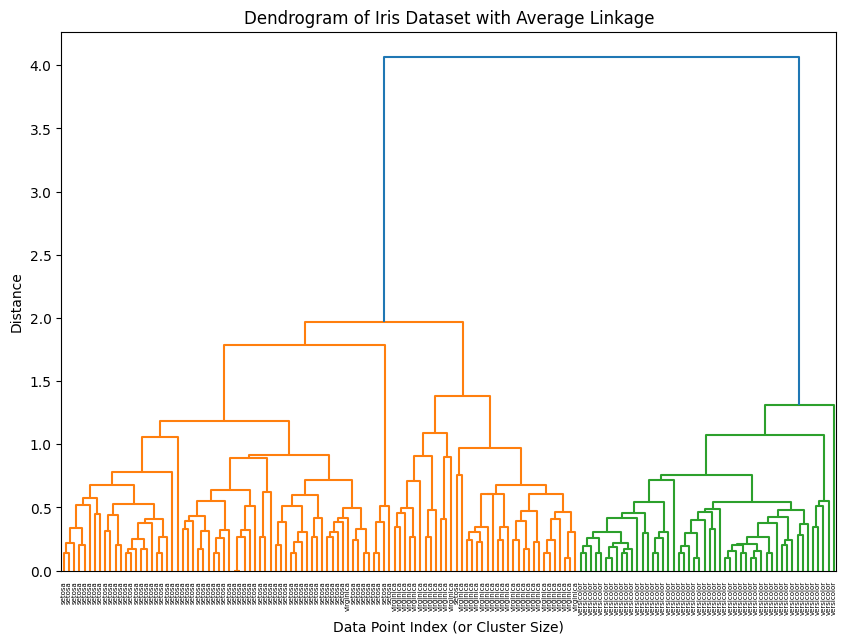

In [10]:
# 30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data

linked = linkage(X, 'average')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=iris.target_names[agg_clustering.labels_], # Use labels from previous agglomerative clustering if needed
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram of Iris Dataset with Average Linkage')
plt.xlabel('Data Point Index (or Cluster Size)')
plt.ylabel('Distance')
plt.show()


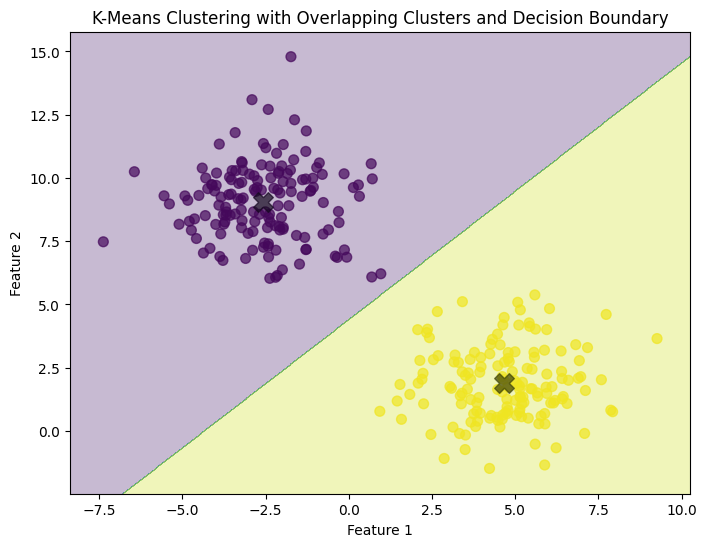

In [11]:
#31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
# decision boundaries

import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.5, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7, marker='X')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

plt.title('K-Means Clustering with Overlapping Clusters and Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [12]:
# 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

import matplotlib.pyplot as plt
import numpy as np
!pip install -U scikit-learn
from sklearn.manifold import TSNE

digits = load_digits()
X = digits.data
y = digits.target

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan.fit(X_tsne)
y_dbscan = dbscan.labels_

unique_labels = set(y_dbcan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 8))
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = [0, 0, 0, 1]

    class_member_mask = (y_dbcan == k)

    xy = X_tsne[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering of Digits Dataset after t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 97.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


KeyboardInterrupt: 

In [2]:


import matplotlib.pyplot as plt
# 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
# the result


X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
y_agg = agg_clustering.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title('Agglomerative Clustering (Complete Linkage) on Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


NameError: name 'make_blobs' is not defined

In [3]:
#34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
# line plot

import matplotlib.pyplot as plt
breast_cancer = load_breast_cancer()
X = breast_cancer.data

inertia_values = []
k_values = range(2, 7)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X)
  inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters for Breast Cancer Dataset')
plt.xticks(k_values)
plt.grid(True)
plt.show()

NameError: name 'load_breast_cancer' is not defined

In [4]:

import matplotlib.pyplot as plt
# 35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
# single linkage

X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)

agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
y_agg = agg_clustering.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title('Agglomerative Clustering (Single Linkage) on Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

NameError: name 'make_circles' is not defined

In [5]:
#36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
# noise

wine = load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(X_scaled)

labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters (excluding noise): {n_clusters}")

NameError: name 'load_wine' is not defined

In [6]:
# 37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
# data points

import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=0)

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='X');
plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

NameError: name 'make_blobs' is not defined

In [7]:
# 38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

iris = load_iris()
X = iris.data

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

labels = dbscan.labels_

n_noise_ = list(labels).count(-1)

print(f"Number of samples identified as noise: {n_noise_}")

NameError: name 'load_iris' is not defined

In [8]:

import matplotlib.pyplot as plt
# 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
# clustering result

X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='X');
plt.title('K-Means Clustering on make_moons Data (Struggles with Non-linear Shapes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

NameError: name 'make_moons' is not defined

In [9]:
#40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
# scatter plot.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(X_pca)
y_kmeans = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_kmeans, cmap='tab10', s=20, alpha=0.8)

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.7, marker='X')

ax.set_title('K-Means Clustering of Digits Dataset (PCA reduced) in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Cluster Label')

plt.show()


NameError: name 'load_digits' is not defined

In [10]:

import matplotlib.pyplot as plt
# 41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
# clustering

X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.labels_

silhouette_avg = silhouette_score(X, y_kmeans)

print(f"Silhouette Score for KMeans with 5 centers: {silhouette_avg}")

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='X');
plt.title('K-Means Clustering with 5 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

NameError: name 'make_blobs' is not defined

In [11]:

import matplotlib.pyplot as plt
# 42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
# Visualize in 2D

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

agg_clustering = AgglomerativeClustering(n_clusters=2)
y_agg = agg_clustering.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title('Agglomerative Clustering on Breast Cancer Dataset (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


NameError: name 'load_breast_cancer' is not defined

In [12]:
# 43.  Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
# side-by-side

import matplotlib.pyplot as plt
import numpy as np

X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.labels_

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
y_dbscan = dbscan.labels_

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='X')
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

unique_labels_dbscan = set(y_dbscan)
colors_dbscan = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_dbscan))]
for k, col in zip(unique_labels_dbscan, colors_dbscan):
    if k == -1:

        col = [0, 0, 0, 1]

    class_member_mask = (y_dbscan == k)

    xy = X[class_member_mask]
    axes[1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

NameError: name 'make_circles' is not defined

In [13]:
# 44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

import matplotlib.pyplot as plt
import numpy as np
iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.labels_

silhouette_per_sample = silhouette_score(X, y_kmeans, metric='euclidean', sample_size=None)
print(f"Average Silhouette Score: {silhouette_score(X, y_kmeans)}")


from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(X, y_kmeans)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = silhouette_values[y_kmeans == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

plt.title("Silhouette Plot for Iris Dataset KMeans Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")

plt.axvline(x=silhouette_score(X, y_kmeans), color="red", linestyle="--", label=f'Average: {silhouette_score(X, y_kmeans):.2f}')
plt.yticks([])
plt.xticks(np.arange(-1, 1.1, 0.1))
plt.ylim([0, len(X) + (3 + 1) * 10])
plt.xlim([-1, 1])
plt.legend()
plt.show()

NameError: name 'load_iris' is not defined

In [14]:

import matplotlib.pyplot as plt
# 45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
# Visualize clusters

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
y_agg = agg_clustering.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title('Agglomerative Clustering (Average Linkage) on Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

NameError: name 'make_blobs' is not defined

In [15]:
#46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
# features)

import matplotlib.pyplot as plt
import seaborn as sns

wine = load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
y_kmeans = kmeans.labels_

import pandas as pd
wine_df = pd.DataFrame(X_scaled, columns=wine.feature_names)
wine_df['Cluster'] = y_kmeans
wine_df['True Label'] = y

sns.pairplot(wine_df, hue='Cluster', vars=wine_df.columns[:4], palette='viridis', diag_kind='kde')
plt.suptitle('KMeans Clustering of Wine Dataset (First 4 Features)', y=1.02)
plt.show()

NameError: name 'load_wine' is not defined

In [16]:
# 47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
# count

import matplotlib.pyplot as plt
import numpy as np


X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.5, random_state=42)


dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan.fit(X)

labels = dbscan.labels_

n_noise_ = list(labels).count(-1)

print(f"Number of points identified as noise: {n_noise_}")

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering on Noisy Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

NameError: name 'make_blobs' is not defined

In [17]:

import matplotlib.pyplot as plt
# 48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
# clusters.

digits = load_digits()
X = digits.data
y = digits.target

tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto', n_iter=300)
X_tsne = tsne.fit_transform(X)

agg_clustering = AgglomerativeClustering(n_clusters=10)
y_agg = agg_clustering.fit_predict(X_tsne)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_agg, s=20, cmap='tab10', alpha=0.8)
plt.title('Agglomerative Clustering of Digits Dataset after t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

NameError: name 'load_digits' is not defined